# **Problem statement**

Classify the different species of the Iris flower with linear model ( or other non-NN model)

The data

set consists of:
* 4 features: sepal length, sepal width, petal length, petal Width
* 3 labels: species of Iris (setosa, virginica, versicolor)

Total number of samples: 150



**Importing the libraries**

 Import libraries for dataset investigation, learning and metrics

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

**Importing the dataset**

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

features_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)
target_df = pd.DataFrame(data= iris.target, columns= ['species'])


Encode numeric label values with string names

In [ ]:
species = {0: 'setosa', 1:'versicolor', 2:'virginica'}
def encoder(specie_value):
  return species[specie_value]

target_df['species'] = target_df['species'].apply(encoder)

In [ ]:
iris_df = pd.concat([features_df, target_df], axis= 1)

# **Data exploration**

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Dataset overview (see docs for details https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Plot pairwise relationships in a dataset

 Dialogonal is a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

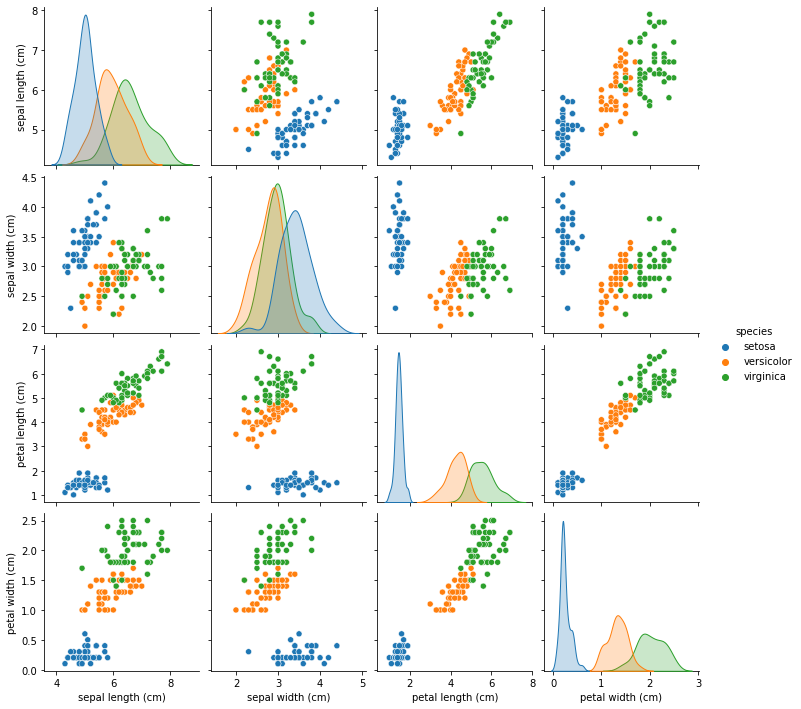

In [ ]:
sns.pairplot(iris_df, hue= 'species')

Also, it is possible to visual display multivariate analysis with the box plot, heatmap, etc.

# **Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X = iris_df.iloc[:, :-1].values
y = iris_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

# **Training the Multiple Logistic Regression model**

In [ ]:
logistic_regression_classifier = LogisticRegression(max_iter=500)
logistic_regression_classifier.fit(X_train,y_train)


LogisticRegression(max_iter=500)

**Predicting results**

In [ ]:
y_pred = logistic_regression_classifier.predict(X_test)

Show a text report showing the main classification metrics

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.83      0.83      0.83        12
   virginica       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



Show confusion matrix (see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]


Check the accuracy

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy is', accuracy_score(y_pred,y_test))

Accuracy is 0.8666666666666667


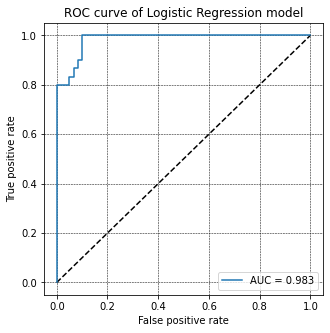

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.grid(color='k', linestyle='--', linewidth=0.5)

# One hot encoding
enc = OneHotEncoder(categories='auto')
Y_onehot = enc.fit_transform(y_test[:, np.newaxis]).toarray()

y_pred = logistic_regression_classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of Logistic Regression model')
plt.legend();

# **Training the decision tree classifier**

In [ ]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train,y_train)
tree_predictions=classifier.predict(X_test)


In [ ]:
print(classification_report(y_test, tree_predictions))
print(confusion_matrix(y_test, tree_predictions))
print(accuracy_score(y_test,tree_predictions))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.91      0.83      0.87        12
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30

[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]
0.9


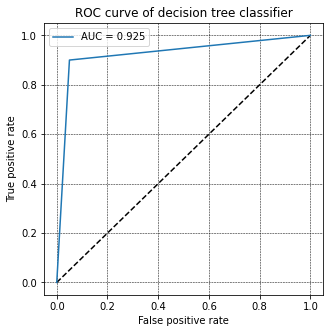

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.grid(color='k', linestyle='--', linewidth=0.5)

y_pred = classifier.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve of decision tree classifier')
plt.legend();

# Configure Neural Network Models

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable

In [ ]:
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
model

Model(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)

# Train the Model

Now its time to run the training. In order to track progress more efficiently, we can use tqdm, which is a great and easy to use progress bar for our training epochs.

In [ ]:
import tqdm

species = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
yNN_train = [species[specie] for specie in y_train]
yNN_test = [species[specie] for specie in y_test]

EPOCHS  = 70
X_NNtrain = torch.tensor(X_train, dtype=torch.float)
y_NNtrain = torch.tensor(yNN_train, dtype=torch.uint8)
X_NNtest  = torch.tensor(X_test, dtype=torch.float)
y_NNtest  = torch.tensor(yNN_test, dtype=torch.uint8)

loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_NNtrain)
    loss = loss_fn(y_pred, y_NNtrain)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_NNtest)
        correct = (torch.argmax(y_pred, dim=1) == y_NNtest).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 70/70 [00:00<00:00, 1095.45it/s]


# Plot Accuracy and Loss from Training

Let’s have a look how our models perform. We can clearly see that adding more nodes makes the training perform better.

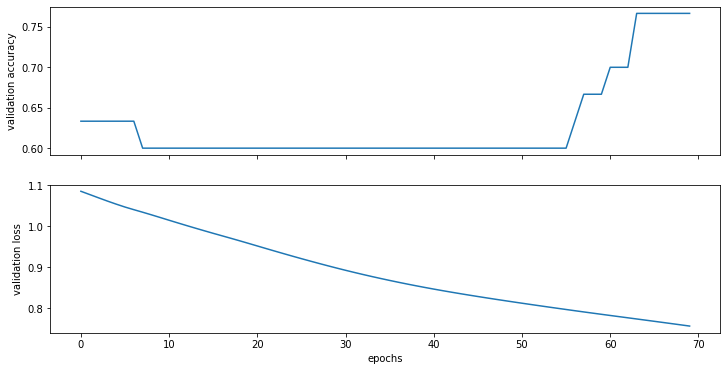

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Show ROC Curve

We have previously split the data and we can compare now with the Receiver Operating Characteristic (ROC) how well the models perform. The ROC plot compares the false positive rate with the true positive rate. We additionally compute for each model the Area under the curve (AUC), where auc = 1 is perfect classification and auc = 0.5 is random guessing (for a two class problem). To prepare the test data, we need to use the OneHotEncoder to encode the integer features into a One-hot vector which we then flatten with numpy.ravel() for sklearn.metrics.roc_curve().

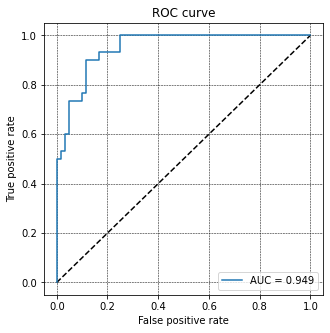

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import OneHotEncoder

plt.figure(figsize=(5, 5))
plt.plot([0, 1], [0, 1], 'k--')
plt.grid(color='k', linestyle='--', linewidth=0.5)

# One hot encoding
enc = OneHotEncoder(categories='auto')
Y_onehot = enc.fit_transform(y_NNtest[:, np.newaxis]).toarray()

with torch.no_grad():
    y_pred = model(X_NNtest).numpy()
    fpr, tpr, threshold = roc_curve(Y_onehot.ravel(), y_pred.ravel())

plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();